In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [89]:
pd.pandas.set_option('display.max_columns', 100)
pd.pandas.set_option('display.max_rows', 100)

df = pd.read_csv(r'C:\Users\Shivam kumar\Desktop\PROJECT\Customer Categorization\Customer-Categorization\Notebook\marketing_campaign.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [90]:
df.shape

(2240, 29)

In [91]:
# DATA CLEANING
#1. Missing Values
#2. Duplicates
#3. Check datatypes
#. Understanding the dataset

In [92]:
# Checking for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [93]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [94]:
df[features_with_na].select_dtypes(exclude=['object']).describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [95]:
# Imputing the missing values with mean
df['Income'] = df['Income'].fillna(df['Income'].median())

In [96]:
# Duplicates
df.duplicated().sum()

np.int64(0)

In [97]:
# dropin z_costContact and z_revenue as they do not add any value to our analysis because they are constant
droping_columns = ['ID','Z_CostContact', 'Z_Revenue']
for column in droping_columns:
    df.drop(column,inplace=True,axis=1)
    print(f"{column} dropped successfully")

ID dropped successfully
Z_CostContact dropped successfully
Z_Revenue dropped successfully


**FEATURE ENGINEERING**

In [98]:
from datetime import datetime

raw_df = df.copy()
df['Age'] = 2026 - df['Year_Birth'] # Assuming the current year is 2026 and finding the age of customers
df['Education']=df['Education'].replace({'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4}).astype(int) # Encoding the education column into numerical values
df['Marital_Status']=df['Marital_Status'].replace({'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0, 'YOLO':0, 'Married':1, 'Together':1}).astype(int) # Encoding the marital status column into numerical values
df['Children'] = df['Kidhome'] + df['Teenhome'] # Creating a new column 'Children' by summing 'Kidhome' and 'Teenhome'
df['Family_Size'] = df['Children'] + 1 # Creating a new column 'Family_Size' by adding 1 (for the customer) to 'Children'

df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] # Creating a new column 'Total_Spending' by summing all the spending columns
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth'] # Creating a new column 'Total_Purchases' by summing all the purchase columns
df['Total Promo'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] # Creating a new column 'Total_Promo' by summing all the promotional response columns

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y') # Converting 'Dt_Customer' column to datetime format
today = datetime.today()

df['Days_as_Customer'] = (today - df['Dt_Customer']).dt.days # Creating a new column 'Days_as_Customer' by calculating the difference between today and 'Dt_Customer' in days
df['Offers_Responding_To'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response'] # Creating a new column 'Offers_Responding_To' by summing all the accepted campaign columns and 'Response'
df['Parental Status'] = np.where(df['Children'] >= 1, 1, 0) # Creating a new column 'Parental_Status' to indicate if the customer has children or not

df.drop(columns=['Year_Birth', 'Kidhome', 'Teenhome'], inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)


df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

In [99]:
df.dtypes

Age                     int64
Education               int64
Marital Status          int64
Parental Status         int64
Children                int64
Income                float64
Total_Spending          int64
Days_as_Customer        int64
Recency                 int64
Wines                   int64
Fruits                  int64
Meat                    int64
Fish                    int64
Sweets                  int64
Gold                    int64
Web                     int64
Catalog                 int64
Store                   int64
Discount Purchases      int64
Total Promo             int64
NumWebVisitsMonth       int64
dtype: object

In [100]:
# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical Features: ", numerical_features)
print("\nNumber of Numerical Features: ", len(numerical_features))

Numerical Features:  ['Age', 'Education', 'Marital Status', 'Parental Status', 'Children', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']

Number of Numerical Features:  21


In [101]:
# Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categorical Features: ", categorical_features)
print("\nNumber of Categorical Features: ", len(categorical_features))

Categorical Features:  []

Number of Categorical Features:  0


In [102]:
# Discrete Features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]
print("Discrete Features: ", discrete_features)
print("\nNumber of Discrete Features: ", len(discrete_features))

Discrete Features:  ['Education', 'Marital Status', 'Parental Status', 'Children', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']

Number of Discrete Features:  10


In [103]:
# Continuous Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("Continuous Features: ", continuous_features)
print("\nNumber of Continuous Features: ", len(continuous_features))

Continuous Features:  ['Age', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

Number of Continuous Features:  11


In [104]:
# Checking Outleirs and capturing them
def outlier_detection(df, feature):
    print(f"\nOutlier detection for feature: {feature}")
    Q1 = df[feature].quantile(0.25)
    print(f"percentile25 for {feature}: {Q1}")
    Q3 = df[feature].quantile(0.75)
    print(f"percentile75 for {feature}: {Q3}")
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print(f"lower_bound for {feature}: {lower_bound}")
    upper_bound = Q3 + 1.5 * IQR
    print(f"upper_bound for {feature}: {upper_bound}")
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [105]:
for feature in continuous_features:
    outliers = outlier_detection(df, feature)
    print(f"Number of outliers in {feature}: {outliers.shape[0]}")


Outlier detection for feature: Age
percentile25 for Age: 49.0
percentile75 for Age: 67.0
lower_bound for Age: 22.0
upper_bound for Age: 94.0
Number of outliers in Age: 3

Outlier detection for feature: Income
percentile25 for Income: 35538.75
percentile75 for Income: 68289.75
lower_bound for Income: -13587.75
upper_bound for Income: 117416.25
Number of outliers in Income: 8

Outlier detection for feature: Total_Spending
percentile25 for Total_Spending: 68.75
percentile75 for Total_Spending: 1045.5
lower_bound for Total_Spending: -1396.375
upper_bound for Total_Spending: 2510.625
Number of outliers in Total_Spending: 3

Outlier detection for feature: Days_as_Customer
percentile25 for Days_as_Customer: 4413.75
percentile75 for Days_as_Customer: 4762.0
lower_bound for Days_as_Customer: 3891.375
upper_bound for Days_as_Customer: 5284.375
Number of outliers in Days_as_Customer: 0

Outlier detection for feature: Recency
percentile25 for Recency: 24.0
percentile75 for Recency: 74.0
lower_bou

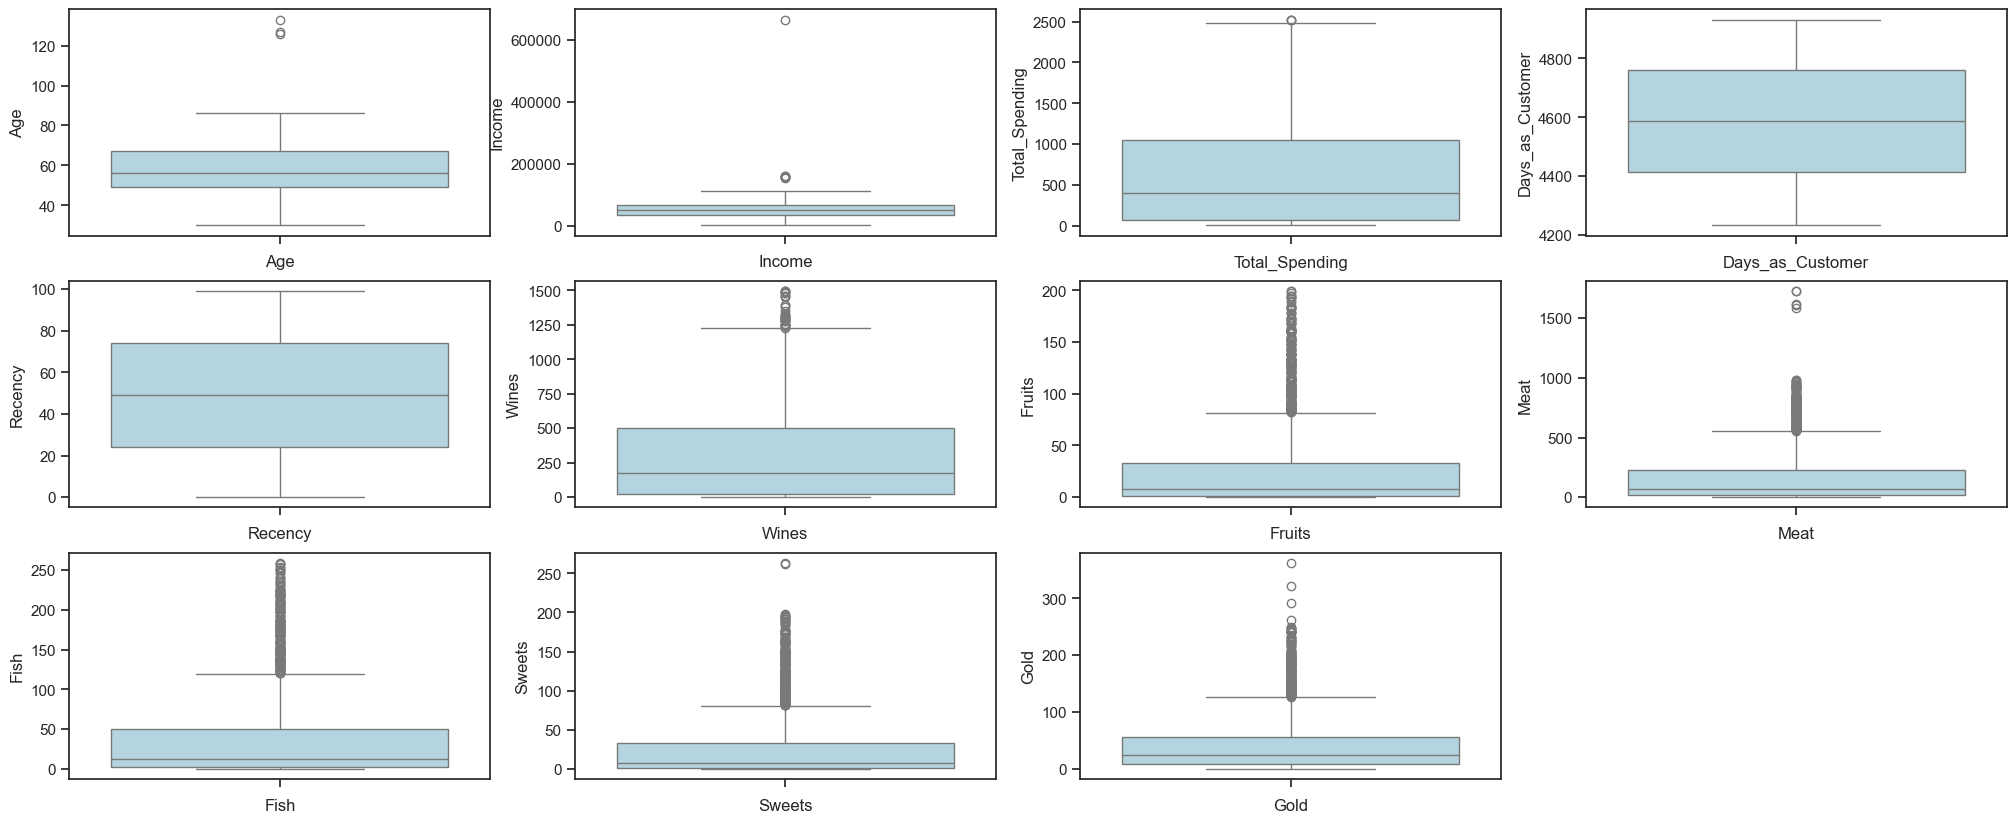

In [106]:
# plotting boxplots for continuous features to visualize outliers
plt.figure(figsize=(25,10))
for i, feature in enumerate(continuous_features):
    plt.subplot(3,4,i+1)
    sns.set_style('ticks')
    plt.xlabel(feature)
    ax =sns.boxplot(y=df[feature], color='lightblue')
    

In [107]:
# caping the outliers
for feature in continuous_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

In [108]:
for feature in continuous_features:
    outliers = outlier_detection(df, feature)
    print(f"Number of outliers in {feature}: {outliers.shape[0]}")


Outlier detection for feature: Age
percentile25 for Age: 49.0
percentile75 for Age: 67.0
lower_bound for Age: 22.0
upper_bound for Age: 94.0
Number of outliers in Age: 0

Outlier detection for feature: Income
percentile25 for Income: 35538.75
percentile75 for Income: 68289.75
lower_bound for Income: -13587.75
upper_bound for Income: 117416.25
Number of outliers in Income: 0

Outlier detection for feature: Total_Spending
percentile25 for Total_Spending: 68.75
percentile75 for Total_Spending: 1045.5
lower_bound for Total_Spending: -1396.375
upper_bound for Total_Spending: 2510.625
Number of outliers in Total_Spending: 0

Outlier detection for feature: Days_as_Customer
percentile25 for Days_as_Customer: 4413.75
percentile75 for Days_as_Customer: 4762.0
lower_bound for Days_as_Customer: 3891.375
upper_bound for Days_as_Customer: 5284.375
Number of outliers in Days_as_Customer: 0

Outlier detection for feature: Recency
percentile25 for Recency: 24.0
percentile75 for Recency: 74.0
lower_bou

In [109]:
# capped successfully

** FEATURE SCALING**

In [110]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]

In [111]:
df[numeric_features].dtypes

Education               int64
Marital Status          int64
Parental Status         int64
Children                int64
Income                float64
Days_as_Customer      float64
Recency               float64
Web                     int64
Catalog                 int64
Store                   int64
Discount Purchases      int64
Total Promo             int64
NumWebVisitsMonth       int64
dtype: object

In [112]:
df[outlier_features].dtypes

Wines             float64
Fruits            float64
Meat              float64
Fish              float64
Sweets            float64
Gold              float64
Age               float64
Total_Spending    float64
dtype: object

In [113]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

dataC = df.copy()

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('StandardScaler', StandardScaler())])

outlier_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('transformer', PowerTransformer(standardize=True))])

preprocessor = ColumnTransformer(transformers=[
    ('Numeric Pipeline', numeric_pipeline, numeric_features),
    ('Outliers Features Pipeline', outlier_features_pipeline, outlier_features)],
    remainder='drop'
    )
columns = dataC.columns
dataC = preprocessor.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns=columns)
print("Scaling and Transformation completed successfully : ")
scaled_data.head()

Scaling and Transformation completed successfully : 


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,-0.458383,-1.346874,-1.584605,-1.264505,0.299651,1.531185,0.307039,1.409304,2.510890,-0.550785,0.349414,-0.439037,0.693904,1.062784,1.487681,1.504406,1.493989,1.474200,1.196801,1.005653,1.315365
1,-0.458383,-1.346874,0.631072,1.396361,-0.263808,-1.190545,-0.383664,-1.110409,-0.568720,-1.166125,-0.168236,-0.439037,-0.130463,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,-0.967034,1.240167,-1.441417
2,-0.458383,0.742460,-1.584605,-1.264505,0.943420,-0.205773,-0.798086,1.409304,-0.226541,1.295237,-0.685887,-0.439037,-0.542647,0.748918,1.145877,0.456428,1.435812,0.579704,0.473642,0.360741,0.661170
3,-0.458383,0.742460,0.631072,0.065928,-1.204881,-1.061881,-0.798086,-0.750450,-0.910898,-0.550785,-0.168236,-0.439037,0.281720,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,-1.069040,-1.314741,-1.117211
4,1.533425,0.742460,0.631072,0.065928,0.307056,-0.953012,1.550305,0.329427,0.115638,0.064556,1.384715,-0.439037,-0.130463,0.123712,1.058075,0.406278,0.832291,0.741799,-0.368949,-1.033786,0.179322


** MODEL BUILDING (CLUSTERING)**

In [132]:
# Creating a Function for Silhoutte Score Plot

from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm
from sklearn.mixture import GaussianMixture

def silhouette_plot(model, range_n_clusters, x_clustering,pca,**kwargs):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # the (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(x_clustering) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        

        if model == GaussianMixture:
            clusterer = model(n_components=n_clusters, random_state=10, **kwargs)
            cluster_labels = clusterer.fit_predict(x_clustering)
        else:
            clusterer = model(n_clusters=n_clusters, random_state=10, **kwargs)
            cluster_labels = clusterer.fit_predict(x_clustering)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        silhouette_avg = silhouette_score(x_clustering, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(x_clustering, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
#        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        sns.scatterplot(
            x=pca[:, 0],
            y=pca[:, 1],
            hue=cluster_labels,
            palette=sns.color_palette("hsv", n_clusters),
            legend="full",
            alpha=0.7,
            ax=ax2
        )

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st principal component")
        ax2.set_ylabel("Feature space for the 2nd principal component")

        plt.suptitle(
            f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )
    
    plt.show()



In [133]:
# PCA (Principal Component Analysis)

from sklearn.decomposition import PCA
df_scaled = scaled_data.copy()
var_ratio = {}
for n in range(2,18):
    pca = PCA(n_components=n)
    df_pca = pca.fit(df_scaled)
    var_ratio[n] = sum(df_pca.explained_variance_ratio_)

In [134]:
# Choosing PCA (n_components) and Kmeans (n_clusters) based on the Clustering metrics


In [135]:
# appling PCA and display clustering metrics

from sklearn.cluster import KMeans
for y in range(2,8):
    print(f"\n\nApplying PCA with n_components = {y}\n")
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(scaled_data)
    for x in range(2,7):
        kmeans = KMeans(n_clusters=x, random_state=42)
        labels = kmeans.fit_predict(data_p)
        print('silhouette-score for n_clusters =',x, 'is :',silhouette_score(data_p, labels), " - Inertia :", kmeans.inertia_)
    
    print()



Applying PCA with n_components = 2

silhouette-score for n_clusters = 2 is : 0.528448934884585  - Inertia : 9060.633671198446
silhouette-score for n_clusters = 3 is : 0.5101568237112325  - Inertia : 5130.22036818363
silhouette-score for n_clusters = 4 is : 0.45367252618238474  - Inertia : 3978.5179702521345
silhouette-score for n_clusters = 5 is : 0.428823669674886  - Inertia : 3311.955689083584
silhouette-score for n_clusters = 6 is : 0.3886681390752062  - Inertia : 2839.750934268086



Applying PCA with n_components = 3

silhouette-score for n_clusters = 2 is : 0.4545352405845945  - Inertia : 12743.17383411057
silhouette-score for n_clusters = 3 is : 0.4064931436700165  - Inertia : 8794.713773056594
silhouette-score for n_clusters = 4 is : 0.3352027877966733  - Inertia : 7599.367339138354
silhouette-score for n_clusters = 5 is : 0.31767245754241297  - Inertia : 6957.811708713152
silhouette-score for n_clusters = 6 is : 0.3109225259743412  - Inertia : 5707.775814310999



Applying P

In [136]:
# Inertia >> Associative variance with n_clusters

In [137]:
# report

# we can go with PCA with component 2 as the silhouette score is good and inertia is also decreasing with increase in n_clusters
# we can go with Kmeans with clusters in range 4-6 as it has good score with lesser Inertia

In [138]:
# Reducing the dimensions of the data

pca_final = PCA(n_components=2,random_state=42).fit(df_scaled)

reduced = pca_final.transform(df_scaled)

pcadf = pd.DataFrame(data=reduced, columns=['PCA1', 'PCA2'])

pcadf.head()

,PCA1,PCA2
0,4.130810,0.501149
1,-3.495736,-0.524639
2,3.032341,-0.850950
3,-2.794908,-1.108072
4,0.786605,0.794306


In [139]:
pca_final.explained_variance_ratio_

array([0.39488365, 0.10832985])

In [140]:
# Elbow Method to find the optimal number of clusters

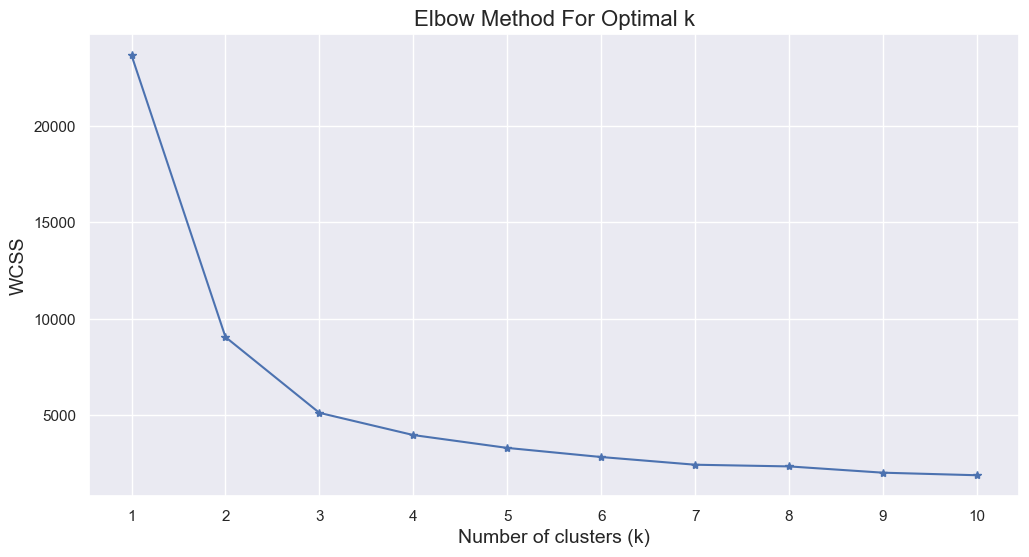

In [141]:
wcss = {}  # WCSS >> within-cluster sum of squares
sns.set()
plt.figure(figsize=(12,6))
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pcadf)
    wcss[i] = kmeans.inertia_

plt.plot(range(1,11), wcss.values(),marker='*')
plt.title('Elbow Method For Optimal k',fontsize=16)
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(range(1,11))
plt.show()

TypeError: sklearn.cluster._kmeans.KMeans() got multiple values for keyword argument 'random_state'

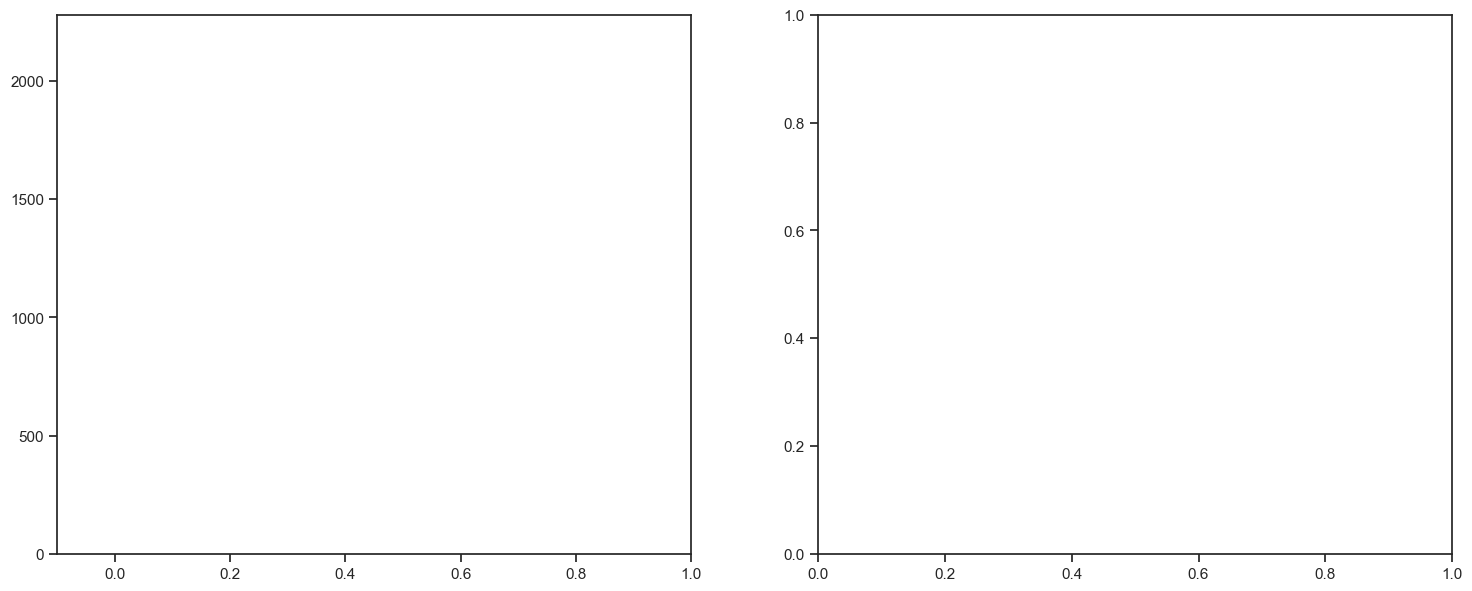

In [142]:
# Silhouette Plot for KMeans Clustering to choose best number of clusters

sns.set_style('ticks')
silhouette_plot(KMeans, range(3,7), pcadf, pca=reduced, random_state=42)

silhouette-score for n_clusters = 3 is : 0.5101568237112325  
silhouette-score for n_clusters = 4 is : 0.45367252618238474  
silhouette-score for n_clusters = 5 is : 0.428823669674886  
silhouette-score for n_clusters = 6 is : 0.3886681390752062 

In [143]:
# Applying Kmeans clustering with 3 clusters

In [144]:
# Fitting the model to reduced data
model = KMeans(n_clusters=3).fit(pcadf)
model_labels = model.labels_
model_centers = model.cluster_centers_

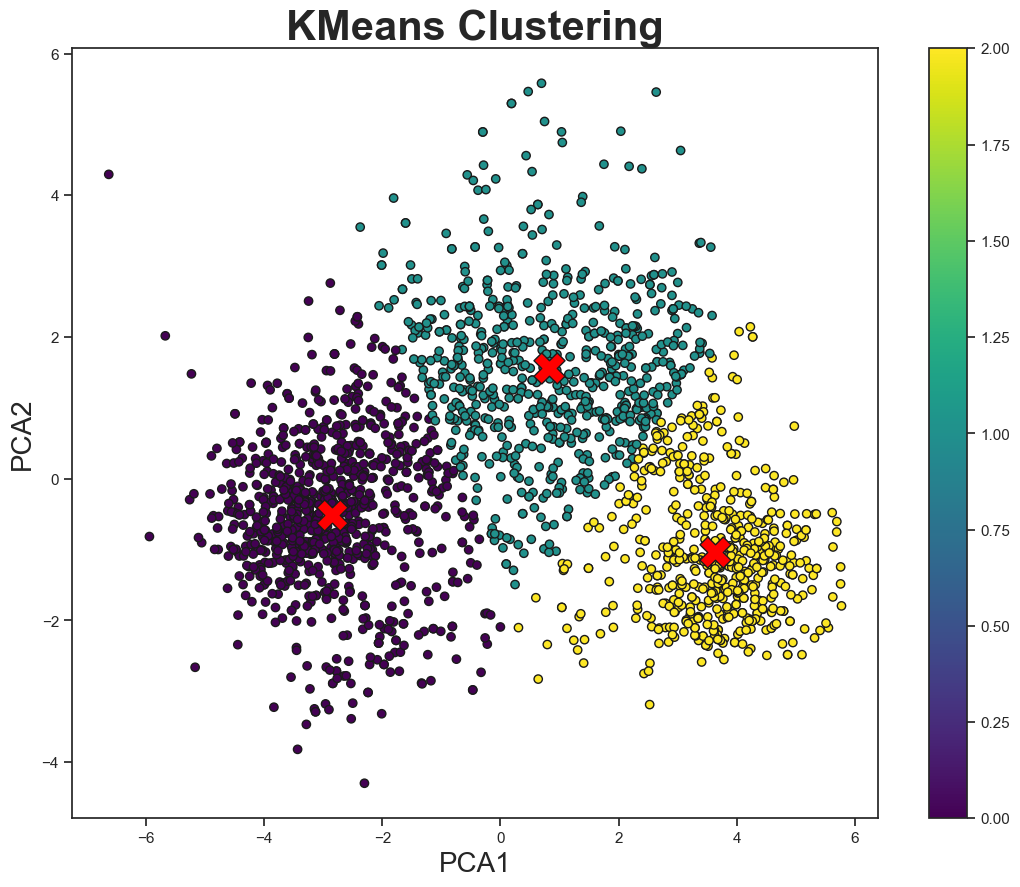

In [145]:
# Plotting the clusters
plt.figure(figsize=(13,10))
plt.title('KMeans Clustering',weight='bold', size=30)
plt.xlabel('PCA1', size=20)
plt.ylabel('PCA2', size=20)
scatter = plt.scatter(x=pcadf['PCA1'], y=pcadf['PCA2'], c=model_labels, cmap='viridis', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', s=500, marker='X', ec='k')

** HEIRARCHICAL CLUSTERING (AGGLOMERATIVE)**

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'random_state'

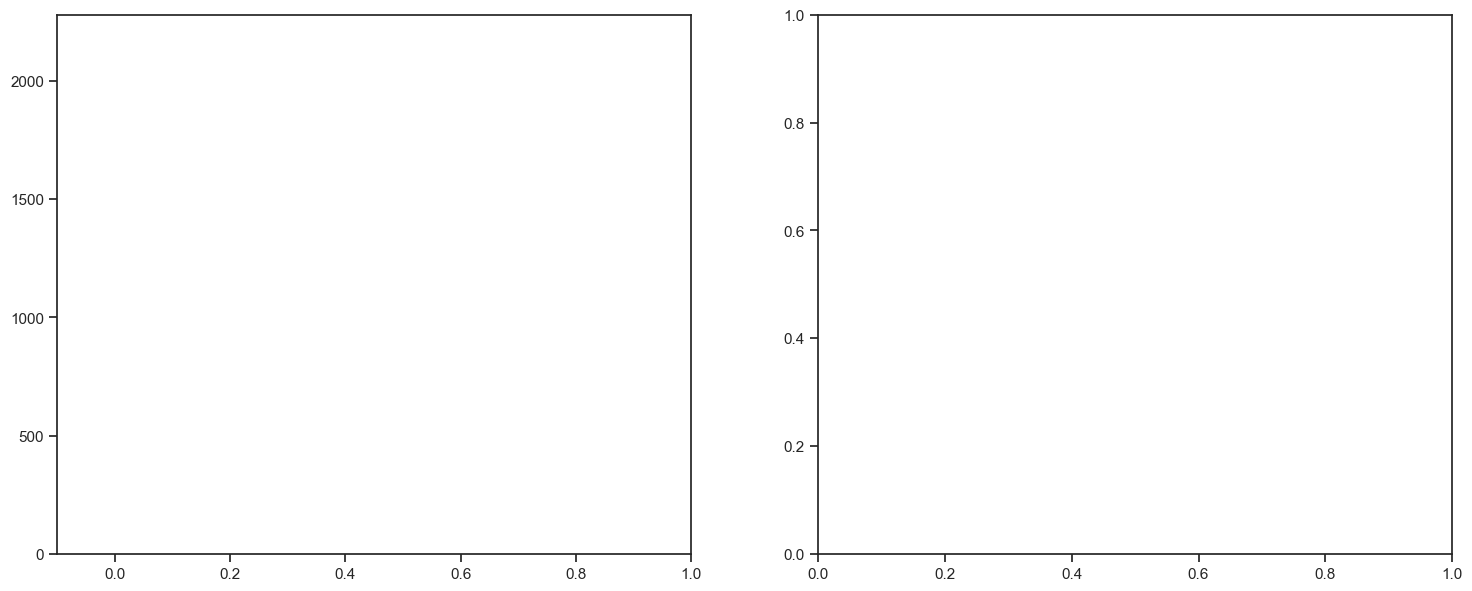

In [146]:
from sklearn.cluster import AgglomerativeClustering

# plot score to choose best clusters for Agglomerative Clustering
silhouette_plot(AgglomerativeClustering, range(3,8), pcadf,reduced)

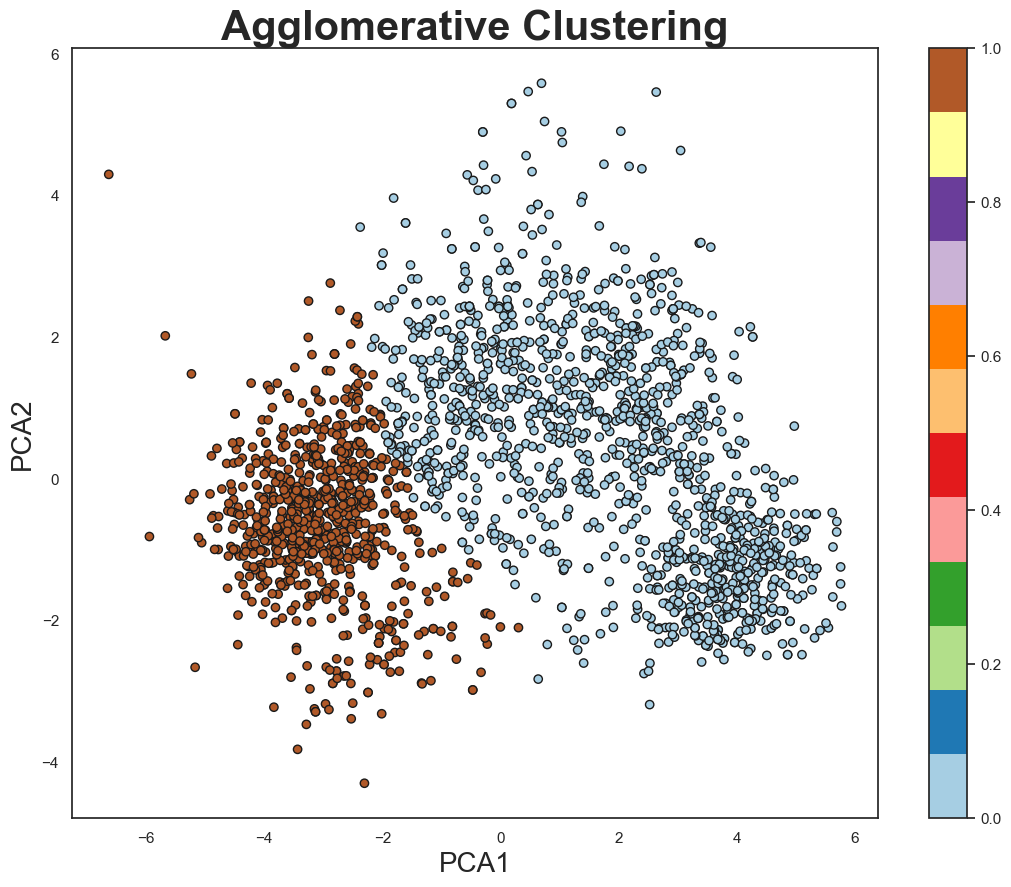

In [147]:
model = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(reduced)
model_labels = model.labels_
plt.figure(figsize=(13,10))

sns.set_style('white')
plt.title('Agglomerative Clustering',weight='bold', size=30)
plt.xlabel('PCA1', size=20)
plt.ylabel('PCA2', size=20)
scatter = plt.scatter(x=pcadf['PCA1'], y=pcadf['PCA2'], c=model_labels, cmap='Paired', ec='k')
plt.colorbar(scatter)

**REPORT**

Agglomerative clustering performed well than kmeans clustering as the silhoutte score for Agglomerative is 0.47 were as Kmeans had 0.44 Silhoutte score

**GAUSSIAN MIXTURE**

For n_clusters = 3 The average silhouette_score is : 0.4768359957926031
For n_clusters = 4 The average silhouette_score is : 0.4450896627149518
For n_clusters = 5 The average silhouette_score is : 0.4462266226119751
For n_clusters = 6 The average silhouette_score is : 0.36966883128768213
For n_clusters = 7 The average silhouette_score is : 0.39635735873513583


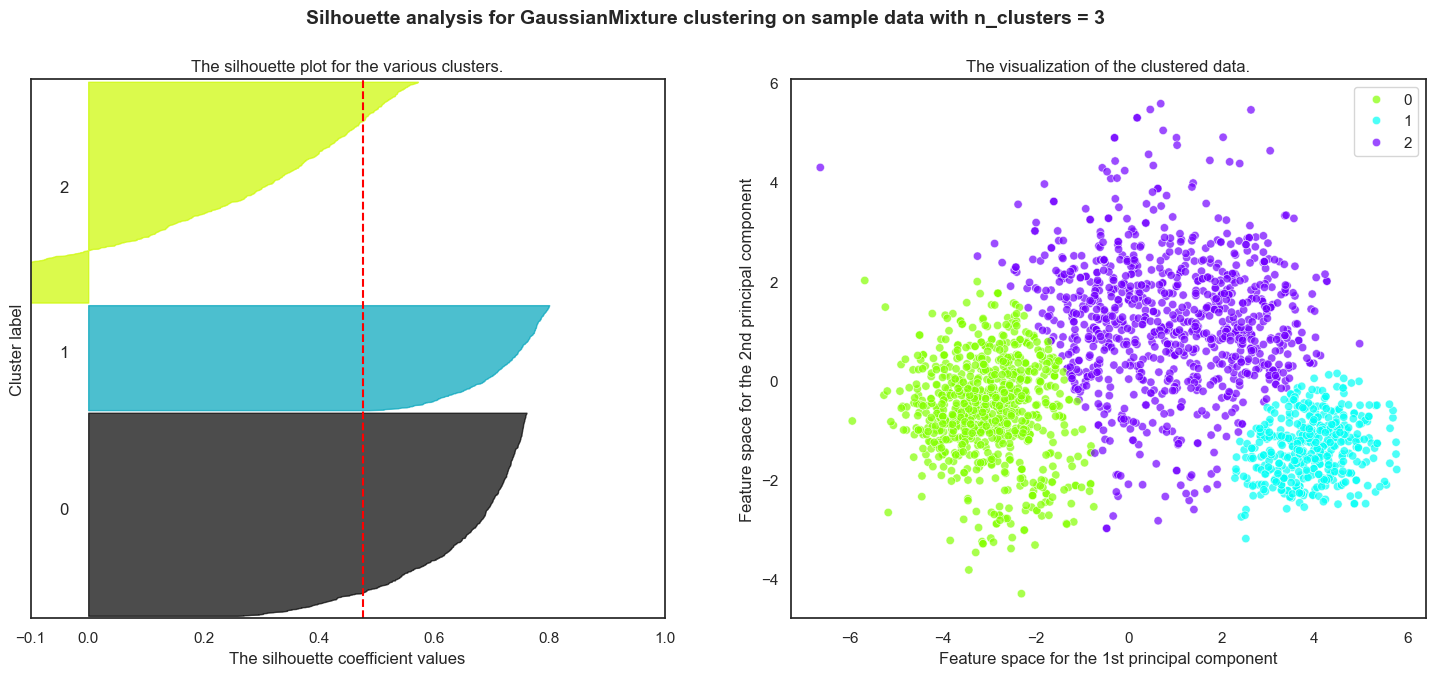

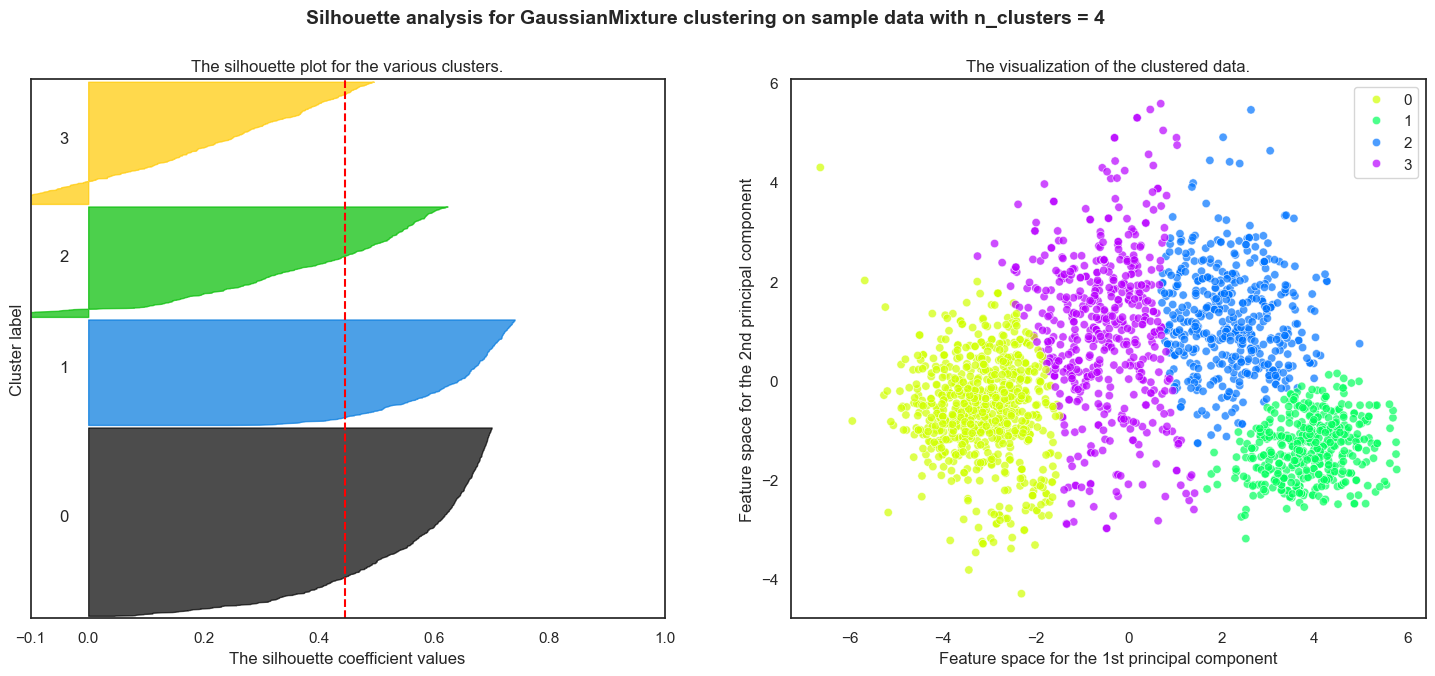

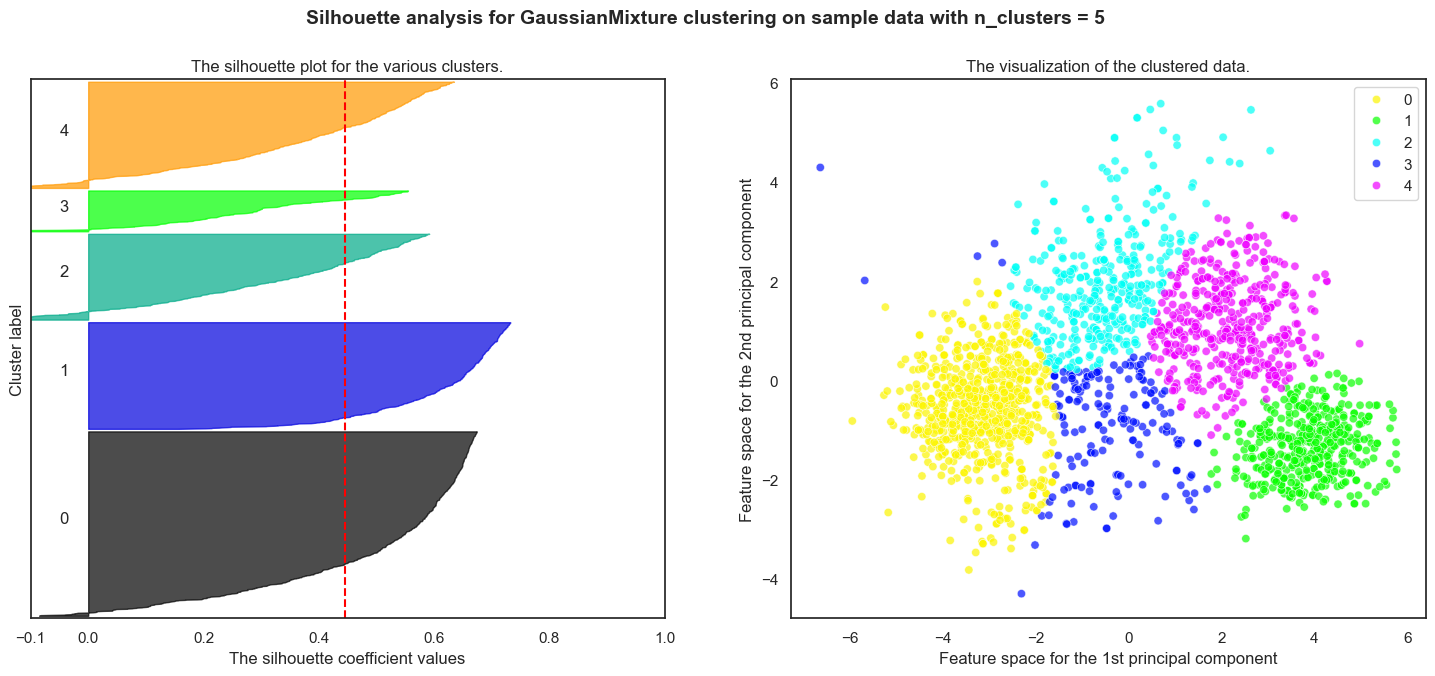

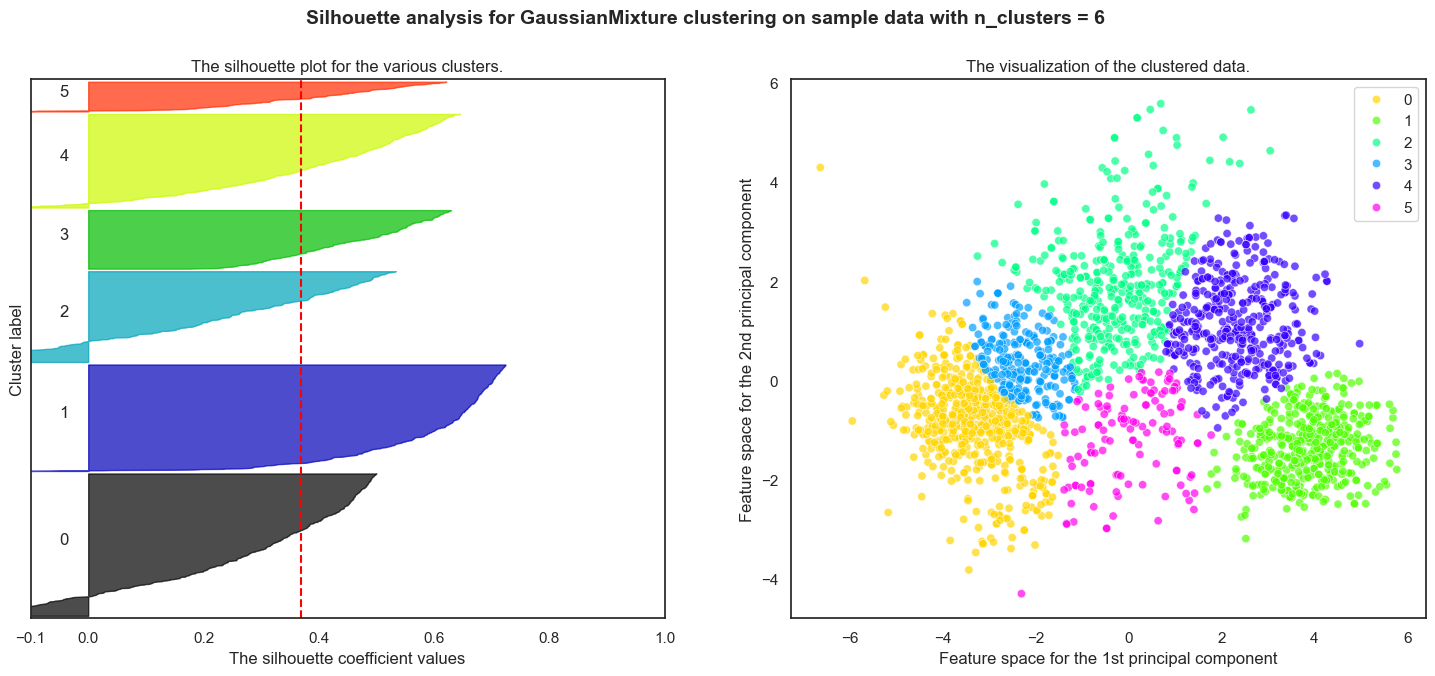

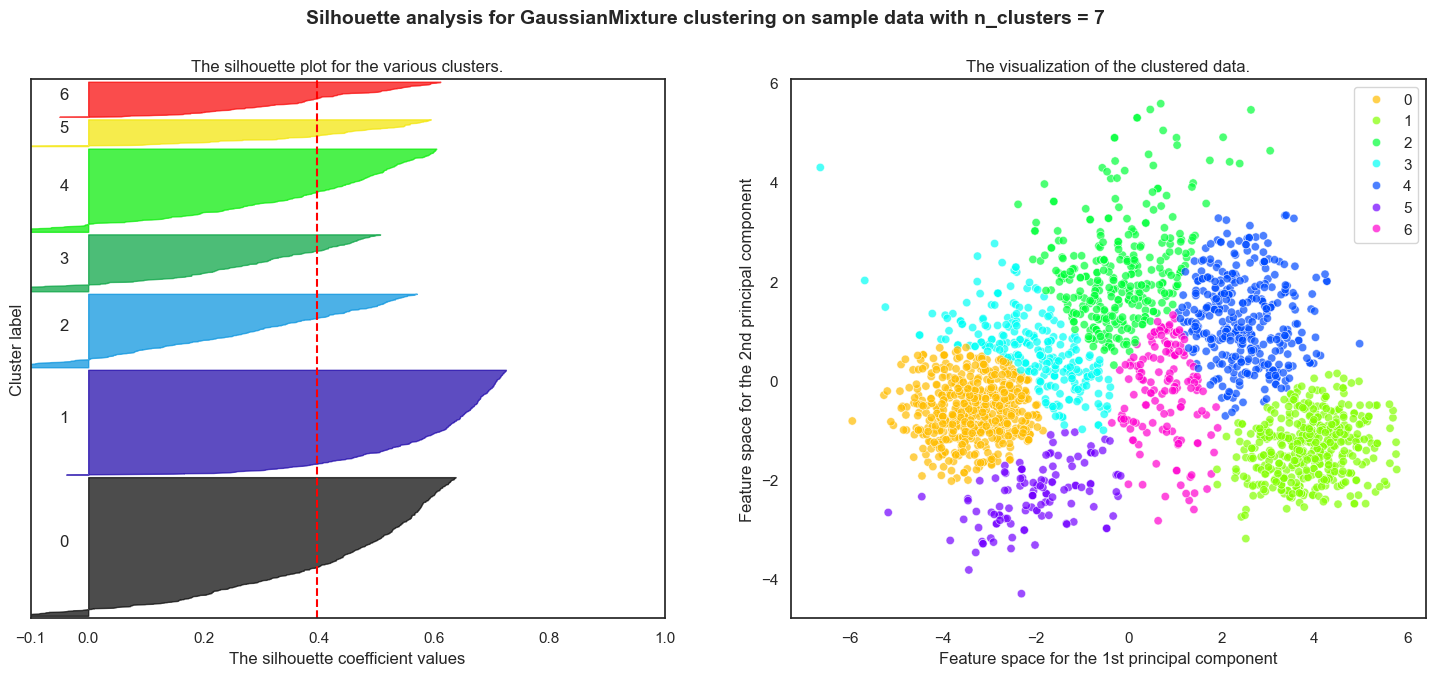

In [148]:
# Gaussian score

from sklearn.mixture import GaussianMixture
silhouette_plot(GaussianMixture, range(3,8), pcadf,reduced)

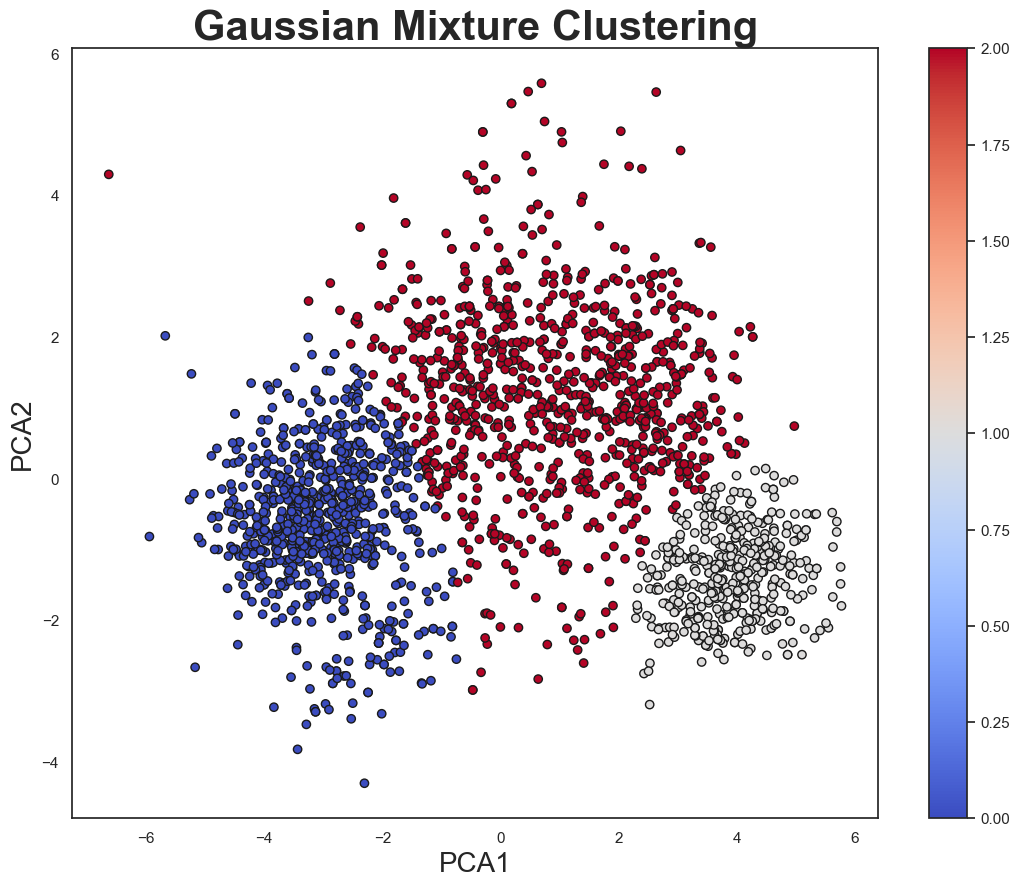

In [149]:
# plotting gaussian mixture
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, random_state=42).fit(reduced)
model_labels = model.predict(reduced)
plt.figure(figsize=(13,10))

sns.set_style('white')
plt.title('Gaussian Mixture Clustering',weight='bold', size=30)
plt.xlabel('PCA1', size=20)
plt.ylabel('PCA2', size=20)
scatter = plt.scatter(x=pcadf['PCA1'], y=pcadf['PCA2'], c=model_labels, cmap='coolwarm', ec='k')
plt.colorbar(scatter)

**DBSCAN CLUSTERING**

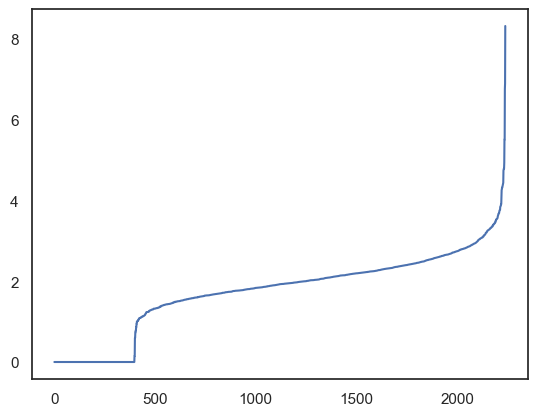

In [152]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=17)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)

distances = distances[:,1]
plt.plot(distances)
plt.show()

**KNEEDLE ALGORITHM**

<Figure size 1000x600 with 0 Axes>

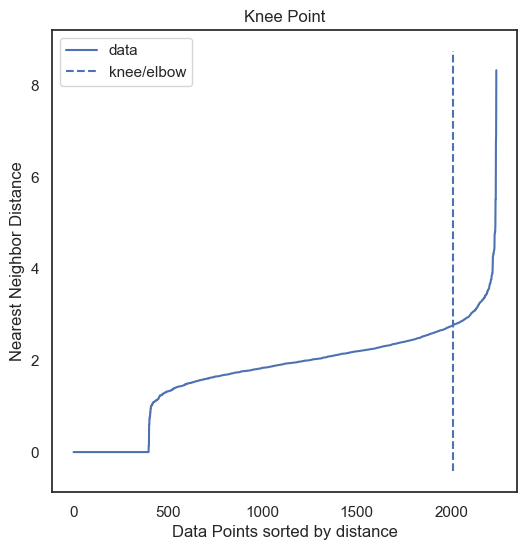

Optimal eps value for DBSCAN is: 2.756143809703729


In [153]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1.0, curve="convex", direction="increasing",interp_method="polynomial")

fig = plt.figure(figsize=(10,6))
knee.plot_knee()
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Nearest Neighbor Distance')
plt.show()

k = distances[knee.knee]  # optimal eps value

print(f"Optimal eps value for DBSCAN is: {k}")

for 2-dimensional data, use DBSCAN's default value of MinPts = 4

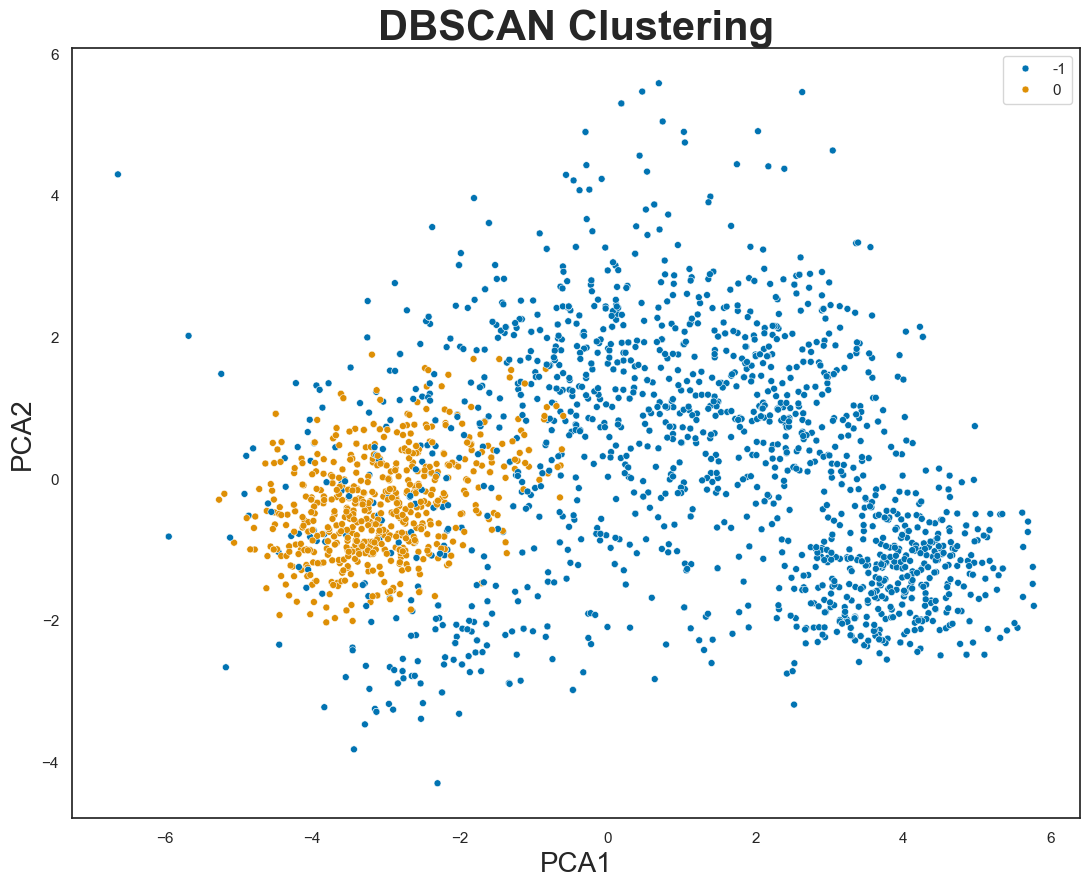

In [155]:
# Plotting DBSCAN Clustering

model = DBSCAN(eps=k, min_samples=100).fit(df_scaled)
model_labels = model.labels_
plt.figure(figsize=(13,10))

sns.set_style('white')
plt.title('DBSCAN Clustering',weight='bold', size=30)
plt.xlabel('PCA1', size=20) 
plt.ylabel('PCA2', size=20)
scatter = sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=model_labels, palette=sns.color_palette("colorblind", len(set(model_labels))), s=25)

DBSCAN didn't perform well

its clear that DBSCAN does not work to well when we are dealing with clusters of varying densities or with high dimensional data

**FINAL MODEL**

as KMeans clustering performed well than rest of the other algorithm we will go with KMeans

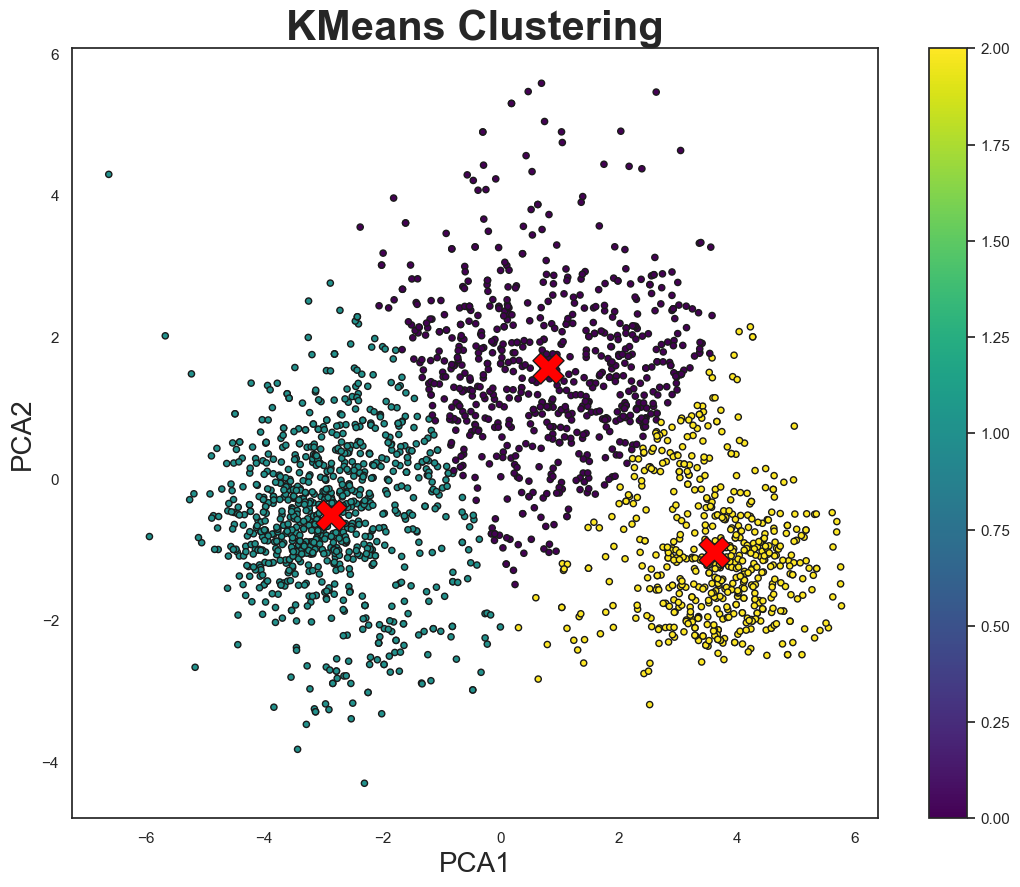

In [161]:
# fitting the model to reduced data

model = KMeans(n_clusters=3).fit(pcadf)
model_labels = model.labels_
model_centers = model.cluster_centers_

# plotting KMeans clustering
plt.figure(figsize=(13,10))
plt.title('KMeans Clustering',weight='bold', size=30)
plt.xlabel('PCA1', size=20)
plt.ylabel('PCA2', size=20)
scatter = plt.scatter(x=pcadf['PCA1'], y=pcadf['PCA2'], c=model_labels,s=20, cmap='viridis', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', s=500, marker='X', ec='k')

**SAVING THE DATA WITH CLUSTER COLUMN**

In [162]:
import os
df['cluster'] = model.labels_.astype(int)
os.makedirs('data', exist_ok=True)
df.to_csv('data/clustered_data.csv', index=False)

### Final report
- As we got the EDA results, we used that same approaches here also. We extracted out some features to derive valuable meanings from the data and used those in model training.
- The data had outliers and multicollinearity, We created pipelines to handle those things
- We have used PCA to minimize the dimensionality of the data.
- Kmeans Clustering algorithm has performed better then rest of the other clustering algorithms. So we went with it.